# Ligand similarity for Posit docking

This notebook explores the ligand similarity of the standard Posit run the Posit run with transferred template.

In [1]:
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set() # Setting seaborn as default style even if use only matplotlib

In [3]:
OUT_DIR = Path("../pics")
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
posit_results = pd.read_csv("../data/posit_results.csv", index_col=0)
posit_template_results = pd.read_csv("../data/posit_template_results.csv", index_col=0)
docking_templates = pd.read_csv("../data/docking_templates.csv", index_col=0)

In [5]:
posit_results.head()

,protein_pdb_id,ligand_pdb_id,ligand_expo_id,pose,rmsd,docking_score,posit_probability,fingerprint_similarity,shape_similarity
kinoml_OEPositDockingFeaturizer_Human_PIM1_rcsb_5v80_chainA_altlocNone_docking-templateNone_2bik-BI1_ligand.sdf_1,5v80,2bik,BI1,1,6.089274,-15.456324,0.24,0.390805,0.947167
kinoml_OEPositDockingFeaturizer_Human_BTK_rcsb_5p9h_chainA_altlocNone_docking-templateNone_4rx5-3YO_ligand.sdf_1,5p9h,4rx5,3YO,1,0.826982,-15.087384,0.78,0.478992,1.040043
kinoml_OEPositDockingFeaturizer_Human_AurA_rcsb_4zts_chainA_altlocNone_docking-templateNone_3p9j-P9J_ligand.sdf_1,4zts,3p9j,P9J,1,9.800667,-11.544377,0.24,0.418605,0.604005
kinoml_OEPositDockingFeaturizer_Human_PIM1_rcsb_5kgk_chainA_altlocNone_docking-templateNone_3r02-UNM_ligand.sdf_1,5kgk,3r02,UNM,1,0.693650,-12.181296,0.18,0.303030,0.749752
kinoml_OEPositDockingFeaturizer_Human_TRKA_rcsb_6d1y_chainA_altlocNone_docking-templateNone_5kmj-6UF_ligand.sdf_1,6d1y,5kmj,6UF,1,7.787918,-12.654554,0.33,0.503597,0.955698


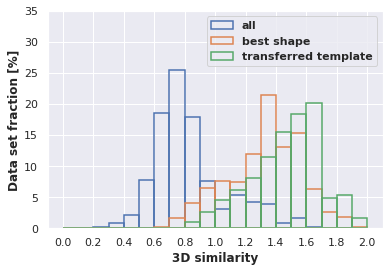

In [6]:
def plot_template_shape_similarity(posit_results, docking_templates, directory=OUT_DIR):
    
    # for each docked ligand get the structure with the most similar co-crystallized ligand
    best_shape = posit_results.sort_values(
        by="shape_similarity", 
        ascending=False
    ).groupby("ligand_pdb_id").head(1)
    
    bins = [x / 10 for x in range(0, 21)]
    ax = sns.histplot(
        data=posit_results, 
        x="shape_similarity", 
        bins=bins, 
        stat="percent", 
        fill=False,
        label="all"
    )
    ax = sns.histplot(
        data=best_shape, 
        x="shape_similarity", 
        bins=bins, 
        stat="percent", 
        fill=False,
        label="best shape"
    )
    ax = sns.histplot(
        data=docking_templates, 
        x="docking_template_similarity", 
        bins=bins, 
        stat="percent", 
        fill=False,
        label="transferred template"
    )
    ax.legend(prop=dict(weight="bold"), fancybox=True)
    ax.set_ylim([0, 35])
    ax.set_xlabel("3D similarity", fontweight="bold")
    ax.set_ylabel("Data set fraction [%]", fontweight="bold")
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2,  1.4, 1.6, 1.8, 2.0])
    
    plt.savefig(directory / "posit_template_similarity.pdf", dpi=300)
    
    return


plot_template_shape_similarity(posit_results, docking_templates)

In [7]:
# for each docked ligand get the structure with the most similar co-crystallized ligand
posit_best_shape = posit_results.sort_values(
    by="shape_similarity", 
    ascending=False
).groupby("ligand_pdb_id").head(1)
posit_best_shape.sort_values(by="ligand_pdb_id").head()

,protein_pdb_id,ligand_pdb_id,ligand_expo_id,pose,rmsd,docking_score,posit_probability,fingerprint_similarity,shape_similarity
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_4dh1_chainA_altlocNone_docking-templateNone_1atp-ATP_ligand.sdf_1,4dh1,1atp,ATP,1,0.699884,-20.808956,0.91,0.795181,1.374937
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_1re8_chainA_altlocNone_docking-templateNone_1bx6-BA1_ligand.sdf_1,1re8,1bx6,BA1,1,0.794001,-22.714592,0.89,0.758294,0.758885
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_1jbp_chainE_altlocNone_docking-templateNone_1fmo-ADN_ligand.sdf_1,1jbp,1fmo,ADN,1,0.796743,15.285161,0.85,0.761905,1.371807
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_3idc_chainA_altlocNone_docking-templateNone_1jbp-ADP_ligand.sdf_1,3idc,1jbp,ADP,1,0.869852,-20.081028,0.89,0.910256,1.458263
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_1jbp_chainE_altlocNone_docking-templateNone_1l3r-ADP_ligand.sdf_1,1jbp,1l3r,ADP,1,0.835926,23.966595,0.99,0.835616,1.513671


In [8]:
posit_template_best_rmsd = posit_template_results.sort_values(by="rmsd").groupby("ligand_pdb_id").head(1)
posit_template_best_rmsd.sort_values(by="ligand_pdb_id").head()

,protein_pdb_id,ligand_pdb_id,ligand_expo_id,pose,rmsd,docking_score,posit_probability,fingerprint_similarity,shape_similarity
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_6mm6_chainC_altlocNone_docking-template4h3p_1atp-ATP_ligand.sdf_1,6mm6,1atp,ATP,1,2.481227,0.498594,0.95,0.867470,1.146531
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_6mm6_chainC_altlocNone_docking-template3krw_1bx6-BA1_ligand.sdf_1,6mm6,1bx6,BA1,1,5.865871,13.578491,0.99,0.288660,0.675523
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_4ntt_chainA_altlocNone_docking-template4o0s_1fmo-ADN_ligand.sdf_1,4ntt,1fmo,ADN,1,1.890260,-1.001577,0.99,0.666667,1.217059
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_6mm6_chainC_altlocNone_docking-template2xuu_1jbp-ADP_ligand.sdf_1,6mm6,1jbp,ADP,1,3.321867,5.754717,0.99,0.846154,1.421822
kinoml_OEPositDockingFeaturizer_Mouse_PKACa_rcsb_6mm6_chainC_altlocNone_docking-template2xuu_1l3r-ADP_ligand.sdf_1,6mm6,1l3r,ADP,1,2.929073,5.754717,0.99,0.846154,1.421822


In [9]:
docking_templates["ligand_pdb_id"] = [x[0] for x in docking_templates.index.str.split("_")]
docking_templates["ligand_expo_id"] = [x[1] for x in docking_templates.index.str.split("_")]
docking_templates.head()

,docking_template_pdb_id,docking_template_chain_id,docking_template_expo_id,docking_template_similarity,ligand_pdb_id,ligand_expo_id
3cy3_JN5,4deb,A,NHJ,1.170450,3cy3,JN5
4ztn_4S3,5hx8,A,66P,1.209250,4ztn,4S3
4a7c_E46,3bgq,A,VX2,1.449917,4a7c,E46
5t1s_76Q,7aj8,A,RJ8,1.104493,5t1s,76Q
4ztl_4S1,4xs2,C,42P,1.433706,4ztl,4S1


In [10]:
# make sure transferred templates have always better shape similarity then in original data set
for i, docking_template in docking_templates.iterrows():
    posit_best_shape_result = posit_best_shape[
        posit_best_shape["ligand_pdb_id"] == docking_template["ligand_pdb_id"]
    ].iloc[0]
    if posit_best_shape_result["shape_similarity"] > docking_template["docking_template_similarity"]:
        print(
            posit_best_shape_result["protein_pdb_id"], 
            posit_best_shape_result["shape_similarity"], 
            docking_template["docking_template_similarity"], 
            docking_template["docking_template_pdb_id"]
        )

4xs2 1.3492966890335083 1.34913170337677 4xs2
4gw8 1.2915117740631104 1.2800339460372925 4aze
5kup 1.6472649574279783 1.647255778312683 5kup
6n9p 1.324284553527832 1.3242828845977783 6n9p


In [11]:
# find examples with better shape similarity when transferring a template ligand from another kinase, but worse RMSD
for i, docking_template in docking_templates.iterrows():
    posit_best_shape_result = posit_best_shape[
        posit_best_shape["ligand_pdb_id"] == docking_template["ligand_pdb_id"]
    ].iloc[0]
    posit_template_best_rmsd_result = posit_template_best_rmsd[
        posit_template_best_rmsd["ligand_pdb_id"] == docking_template["ligand_pdb_id"]
    ]
    if len(posit_template_best_rmsd_result) == 0:
        continue
    else:
        posit_template_best_rmsd_result = posit_template_best_rmsd_result.iloc[0]
    if docking_template["docking_template_similarity"] - posit_best_shape_result["shape_similarity"] > 0.5:
        if posit_best_shape_result["rmsd"] < 2:
            if posit_template_best_rmsd_result["rmsd"] > 2:
                print(
                    posit_best_shape_result["ligand_pdb_id"],
                    posit_best_shape_result["protein_pdb_id"],
                    posit_best_shape_result["shape_similarity"],
                    docking_template["docking_template_pdb_id"],
                    docking_template["docking_template_similarity"], 
                    posit_best_shape_result["rmsd"],
                    posit_template_best_rmsd_result["rmsd"]
                )

5usy 4jia 1.146305799484253 4qmu 1.8808801174163816 0.9241142105140868 2.216184951835189
3ow3 1l3r 0.8183354735374451 3ow4 1.5738661289215088 1.7629283120233032 2.375028799825384
2erz 1fmo 0.9051570892333984 2esm 1.5806787014007568 1.0645104844145836 3.591411574191699
4yo6 6o9d 1.4153509140014648 4hge 1.939711093902588 0.4708676388682203 3.545868199985254
4p7e 3tjc 1.0016909837722778 5ut5 1.794389247894287 1.908681097861384 3.311057650761561
3dcv 2obj 1.256917119026184 3q3b 1.9320306777954104 0.8370108379567983 2.345645408187772
3eqf 3zm4 0.8153864145278931 1r0p 1.8860572576522827 0.9761078980171344 2.497750690978928
2w1g 2w1f 1.313011884689331 4qmm 1.9048566818237305 1.0690432638579228 2.518912073835505


In [12]:
# find examples with better shape similarity when transferring a template ligand from another kinase, but better RMSD
for i, docking_template in docking_templates.iterrows():
    posit_best_shape_result = posit_best_shape[
        posit_best_shape["ligand_pdb_id"] == docking_template["ligand_pdb_id"]
    ].iloc[0]
    posit_template_best_rmsd_result = posit_template_best_rmsd[
        posit_template_best_rmsd["ligand_pdb_id"] == docking_template["ligand_pdb_id"]
    ]
    if len(posit_template_best_rmsd_result) == 0:
        continue
    else:
        posit_template_best_rmsd_result = posit_template_best_rmsd_result.iloc[0]
    if docking_template["docking_template_similarity"] - posit_best_shape_result["shape_similarity"] > 0.5:
        if posit_best_shape_result["rmsd"] > 2:
            if posit_template_best_rmsd_result["rmsd"] < 2:
                print(
                    posit_best_shape_result["ligand_pdb_id"],
                    posit_best_shape_result["protein_pdb_id"],
                    posit_best_shape_result["shape_similarity"],
                    docking_template["docking_template_pdb_id"],
                    docking_template["docking_template_similarity"], 
                    posit_best_shape_result["rmsd"],
                    posit_template_best_rmsd_result["rmsd"]
                )

5dgz 4wsy 0.9658527970314026 2jdr 1.640472650527954 6.837546297222906 1.4797477037206936
4qmq 4qmu 0.9701361656188964 6ble 1.7885462045669556 2.9221534480915863 1.329622017596512
4qmv 4qmu 0.876616895198822 5vd2 1.606799602508545 4.197922262682982 1.4695995853212775
6bsk 5dia 1.0788053274154663 3at4 1.6924433708190918 6.037085697112947 0.5279811617310382
